# Lecture 5 - Multi-layer Perceptron Demo
## From Scratch
Author: Kaihang Zhang<br>
 khzhang2@connect.hku.hk <br>
208 Haking Wong Building<br>
Department of Civil Engineering<br>
The University of Hong Kong<br>


In [1]:
##################################################################################################################
##      Script template created for the course CIVL 7018 at The University of Hong Kong.                        ##
##      in Spring 2023 semester                                                                                 ##
##      Licensing Information:  You are free to use or extend this project if:                                  ##
##          (1) You don't distribute or publish coding solutions for CIVL 7018 Assignments online.              ##
##          (2) You retain this notice.                                                                         ##
##          (3) You provide clear attribution to The University of Hong Kong                                    ##
##################################################################################################################

Consider the ridership of a public transportation system in the San Francisco
bay area, Bay Area Rapid Transit (BART). Recently, a group of researchers is
assuming that the ridership of the transit system is related to some
socio-economic factors, which are preliminarily the **total population near
each station, number of households that own 0 vehicles, total
employment, and total road network density**. The raw census data is
collected by the [Environment Protection Agency of the United States](https://www.epa.gov/sites/default/files/2021-06/documents/epa_sld_3.0_technicaldocumentationuserguide_may2021.pdf) while
the ridership data is available at the BART’s [official website](https://www.bart.gov/about/reports/ridership). The data for the
catchment area for each station is processed by Github user [HaTT2018](https://github.com/HaTT2018/BART_Ridership_Prediction).

To make this problem as simple as possible, we only investigate the ridership from station *Embarcadero* (the CBD of San Francisco) to other stations. (picture adopted from https://www.bart.gov/system-map)

<img title="Map of BART" src="./img/BART.png" width="800">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [3]:
# take the first 48 stations becasue the 
# last 2 stations were not yet opened
# by the time this data was collected
data_BART_sld = pd.read_csv('data_X.csv').iloc[:48, 1:]
data_BART_sld.head()

,TotPop,AutoOwn0,TotEmp,Tot Rd Dens
0,11084,1664,33120,42.232657
1,142973,20505,103479,32.296762
2,36177,4704,47570,31.822631
3,104191,8018,39663,32.894203
4,70630,1142,13924,20.531431


In [4]:
# The file "3d_daily.npy" contains the daily ridership
# data from each station to all the other stations.
# Its shape is [50, 50, 365]. Each dimension represents
# origin, destination, day in the year respectively

# Embarcadero is the 18th station in the list
OD_BART = np.load('3d_daily.npy').sum(axis=2)[17, :48]

In [5]:
print('Shape of data_BART_sld', data_BART_sld.shape)
print('Shape of OD_BART', OD_BART.shape)

Shape of data_BART_sld (48, 4)
Shape of OD_BART (48,)


## The model layout

Our job is to train an MLP model which takes "data_BART_sld" as input and generate "OD_BART" as output and make it as close to the real data as possible.

Consider a simple MLP, with 1 input layer, 1 hidden layer, and 1 output layer. The input layer has a dimension of 4 because we have 4 attributes of the scio-economic census. The output layer is 1-dimensional because the ridership is a scalar. The number of dimension of the hidden layer is set to be 2 for the sake of simplicity. The activation function is ReLU (instead of sigmoid function as introduced in the lecture) just to simplify the problem. $ReLU(x)=x$ for $x>=0$ and $ReLU(x)=0$ for $x<0$. The model layout is shown in the figure below.

<img src="./img/MLP_demo.png" width="500">

For simplicity, let's ignore bias in this MLP.

We have: 

$o1 = k_1 \times a_1 + k_2 \times a_2$

$a_1 = ReLU(h_1)$,
$a_2 = ReLU(h_2)$ 

$h_1 = x_1 \times w_{11}+x_2 \times w_{12}+x_3 \times w_{13}+x_4 \times w_{14}$ 

$h_2 = x_2 \times w_{21}+x_2 \times w_{22}+x_3 \times w_{23}+x_4 \times w_{24}$ 

In vector-matrix form, we have:

$X = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$,
$H = \begin{bmatrix} h_1 \\ h_2 \end{bmatrix}$,
$A = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}$,
$W = \begin{bmatrix} w_{11} & w_{12} & w_{13} & w_{14} \\ w_{21} & w_{22} & w_{23} & w_{24} \end{bmatrix}$,
$K = \begin{bmatrix} k_1 & k_2 \end{bmatrix}$ 

$H = W \times X$

$A = ReLU(H)$

$O = K \times A$

Finally, $O = K \times ReLU(W \times X)$

## Gradient descent and the loss function

Suppose the label true value is $Y$ given input $\vec{X} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$, and we use squared loss function $L = \frac{1}{2}(o1 - y)^2$.

$W$ and $K$ contain all the parameters (10 numbers in total) we need to update in the training process.

Before training starts, we assign some random initial values to our parameters $W$ and $K$.

During training, we obtain $\frac{\partial L}{\partial W}$ and $\frac{\partial L}{\partial K}$, then we use $W_i = W_{i-1} - \frac{\partial L}{\partial W} \times lr$ and $K_i = K_{i-1} - \frac{\partial L}{\partial K} \times lr$ to update $W$ and $K$ in order to make loss L smaller and smaller.

This is the basic idea of gradient decent, which is a popular set of non-convex optimization methods used in machine learning especially in deep learning.

## The expressions for the gradients of our 8 parameters in $W$ and 2 parameters in $K$

Our loss function is: $L = \frac{1}{2}(o1-y)^2 = \frac{1}{2}(K \times A - y)^2 = \frac{1}{2}((k_1 \times a_1 + k_2 \times a_2) - y)^2$

$\frac{\partial L}{\partial K} = 
\begin{bmatrix} \frac{\partial L}{\partial k_1} \\ \frac{\partial L}{\partial k_2} \end{bmatrix} = 
\begin{bmatrix} \frac{\partial L}{\partial o1} \frac{\partial o1}{\partial k_1} \\ \frac{\partial L}{\partial o1} \frac{\partial o1}{\partial k_2} \end{bmatrix} = 
\begin{bmatrix} (o1-y) a_1 \\ (o1-y) a_2 \end{bmatrix} = 
\begin{bmatrix}a_1 \\ a_2\end{bmatrix}(o1-y) = A(o1-y)$

$\frac{\partial L}{\partial W}$ = 
$\begin{bmatrix} 
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} & \frac{\partial L}{\partial w_{14}} \\ 
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} & \frac{\partial L}{\partial w_{24}}
\end{bmatrix}$ = 
$\begin{bmatrix} 
  \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{11}} 
& \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{12}} 
& \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{13}}
& \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{14}} \\ 
  \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{21}} 
& \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{22}} 
& \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{23}} 
& \frac{\partial L}{\partial o1}\frac{\partial o1}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{24}} 
\end{bmatrix}$ =
$\begin{bmatrix} 
  (o1-y)k_1\frac{\partial ReLU(h_1)}{\partial h_1}x_1 
& (o1-y)k_1\frac{\partial ReLU(h_1)}{\partial h_1}x_2
& (o1-y)k_1\frac{\partial ReLU(h_1)}{\partial h_1}x_3
& (o1-y)k_1\frac{\partial ReLU(h_1)}{\partial h_1}x_4 \\ 
  (o1-y)k_2\frac{\partial ReLU(h_2)}{\partial h_2}x_1
& (o1-y)k_2\frac{\partial ReLU(h_2)}{\partial h_2}x_2
& (o1-y)k_2\frac{\partial ReLU(h_2)}{\partial h_2}x_3
& (o1-y)k_2\frac{\partial ReLU(h_2)}{\partial h_2}x_4
\end{bmatrix}$ = 
$(o1-y)\begin{bmatrix} 
k_1\frac{\partial ReLU(h_1)}{\partial h_1} \\ 
k_2\frac{\partial ReLU(h_2)}{\partial h_2}
\end{bmatrix} \begin{bmatrix} x_1 & x_2 & x_3 & x_4 \end{bmatrix}$ =
$\begin{bmatrix}
k_1 & 0 \\
0 & k_2 
\end{bmatrix}
\begin{bmatrix} 
\frac{\partial ReLU(h_1)}{\partial h_1} \\ 
\frac{\partial ReLU(h_2)}{\partial h_2}
\end{bmatrix} 
(o1-y)
\begin{bmatrix} x_1 & x_2 & x_3 & x_4 \end{bmatrix}$

In [6]:
# define the relu function
def relu(X):
    # X: A numpy.ndarray object
    # return: ReLU function, ReLU(x)=x for x>=0 and ReLU(x)=0 for x<0
    
    ret = np.zeros(X.shape)
    ind = X > 0
    ret[ind] += X[ind]
    return ret

In [7]:
# define the partial derivative of relu function
def prelu(X):
    # X: A numpy.ndarray object
    # return: gradient of relu function with respect to its input
    
    ret = np.zeros(X.shape)
    ret[X > 0] = 1
    return ret

In [8]:
# define the forward propagation
def DNNforward(X, W, K):
    # X: dataset input features, numpy.ndarray
    # W: current weight matrix W, numpy.ndarray of shape (2,3)
    # K: current weight matrix K, numpy.ndarray of shape (2,)
    # return: (H, A, O)
    # H: current hidden layer output value H, numpy.ndarray
    # A: current activation layer output A, numpy.ndarray
    # O: current DNN model output O, numpy.ndarray
    
    H = W @ X.T
    A = relu(H)
    O = K @ A
    return H, A, O

In [9]:
# define the backward propagation
def DNNbackward(X, y, W, K, H, A, O):
    # X: dataset input features, numpy.ndarray
    # y: dataset labels, numpy.ndarray
    # W: current weight matrix W, numpy.ndarray
    # K: current weight matrix K, numpy.ndarray
    # H: current hidden layer output value H, numpy.ndarray
    # A: current activation layer output A, numpy.ndarray
    # O: current DNN model output O, numpy.ndarray
    # return: (pLpW, pLpK)
    # pLpW: current gradient of Loss with respect to W
    # pLpK: current gradient of Loss with respect to K
    
    pLpW = np.array([[K[0], 0], [0, K[1]]]) @ prelu(H) * (O-y) @ X
    pLpK = A @ (O-y)
    return pLpW/X.shape[0], pLpK/X.shape[0]

In [10]:
# gradient decent function in batches
def train(X, y, W, K, lr, num_epochs=10, batch_size=10, print_loss=False):
    # X: dataset input features, numpy.ndarray
    # y: dataset labels, numpy.ndarray
    # W: current weight matrix W, numpy.ndarray
    # K: current weight matrix K, numpy.ndarray
    # lr: learning rate, float or int
    # nump_epochs: total number of epochs we train our NN model, int
    # batch_size: number of samples in each batch, int
    # print_loss: whether we print loss in each epoch during training, bool
    # return: (W_list, K_list)
    # W_list: list of numpy.ndarrays containing all the W parameters after each epoch
    # K_list: list of numpy.ndarrays containing all the K parameters after each epoch
    W_list, K_list = [], []
    train_loss, val_loss = [], []
    dataset_size = len(y)
    for epoch in range(num_epochs):
        for batch_idx in range(int(np.ceil(dataset_size/batch_size))):
            start_idx = batch_idx * batch_size
            end_idx = min((batch_idx+1)*batch_size, dataset_size-1)
            H, A, O = DNNforward(X[start_idx:end_idx], W, K)
            if print_loss:
                print("Epoch "+str(epoch+1)+", batch "+str(batch_idx+1)+", loss = "+str(loss(y[start_idx:end_idx], O)), end='\n')
            # update W and K
            pLpW, pLpK = DNNbackward(X[start_idx:end_idx, :], y[start_idx:end_idx], W, K, H, A, O)
            W = W - lr*pLpW
            K = K - lr*pLpK
            train_loss.append(loss(y[start_idx:end_idx], O))
            
            _,_,y_val_pred = DNNforward(X_val, W, K)
            val_loss.append(loss(y_val_pred, y_val))
            
        W_list.append(W)
        K_list.append(K)
    return W_list, K_list, train_loss, val_loss

In [11]:
# define the loss function
def loss(y, O):
    # we use squared loss
    return np.mean(1/2 * (y-O)**2)

## Prepare data
We divide the original data into two parts, 70% for training and 30% for model validation.

In [58]:
X_train = minmax_scale(data_BART_sld)[:33, :]
y_train = minmax_scale(OD_BART)[:33]
X_val = minmax_scale(data_BART_sld)[33:, :]
y_val = minmax_scale(OD_BART)[33:]

In [71]:
# initialize weight parameters
np.random.seed(30)
W = np.random.uniform(size=(2,4))
K = np.random.uniform(size=(2))

# set learning rate
lr = 0.01

In [77]:
# we use full-batch train
W_list, K_list, train_loss, val_loss  = train(X_train, y_train, W, K, lr, num_epochs=200, batch_size=50, print_loss=True)

Epoch 1, batch 1, loss = 0.1099915139665769
Epoch 2, batch 1, loss = 0.10800894313197042
Epoch 3, batch 1, loss = 0.1060935822212688
Epoch 4, batch 1, loss = 0.10424278309012733
Epoch 5, batch 1, loss = 0.10245402023510325
Epoch 6, batch 1, loss = 0.10072488415414454
Epoch 7, batch 1, loss = 0.09905307512055103
Epoch 8, batch 1, loss = 0.09743639734130587
Epoch 9, batch 1, loss = 0.0958727534729571
Epoch 10, batch 1, loss = 0.09436013947031187
Epoch 11, batch 1, loss = 0.0928966397451124
Epoch 12, batch 1, loss = 0.09148042261360684
Epoch 13, batch 1, loss = 0.09010973601352555
Epoch 14, batch 1, loss = 0.0887829034724384
Epoch 15, batch 1, loss = 0.08749832031081076
Epoch 16, batch 1, loss = 0.08625445006431041
Epoch 17, batch 1, loss = 0.08504982111104928
Epoch 18, batch 1, loss = 0.0838830234904856
Epoch 19, batch 1, loss = 0.08275270590167044
Epoch 20, batch 1, loss = 0.08165757286940355
Epoch 21, batch 1, loss = 0.08059638206767693
Epoch 22, batch 1, loss = 0.07956794179053224
Epo

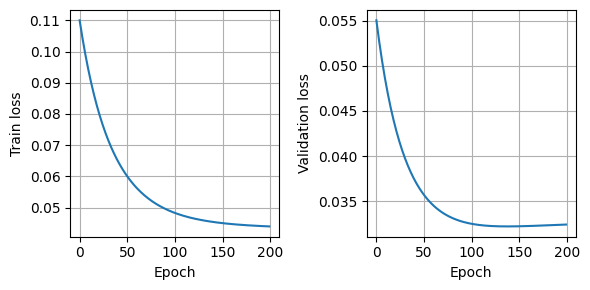

In [78]:
fig = plt.figure(figsize=[6, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(train_loss)
ax1.grid()
ax1.set_ylabel('Train loss')
ax1.set_xlabel('Epoch')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(val_loss)
ax2.grid()
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epoch')

plt.tight_layout()

In [79]:
# make prediction
_,_,y_pred = DNNforward(X_val, W_list[-1], K_list[-1])
y_pred

array([0.17827485, 0.46037422, 0.37205056, 0.22388157, 0.37520937,
       0.35721768, 0.0303995 , 0.32581148, 0.33090312, 0.42519601,
       0.21037785, 0.25055754, 0.25308618, 0.14419037, 0.07499758])

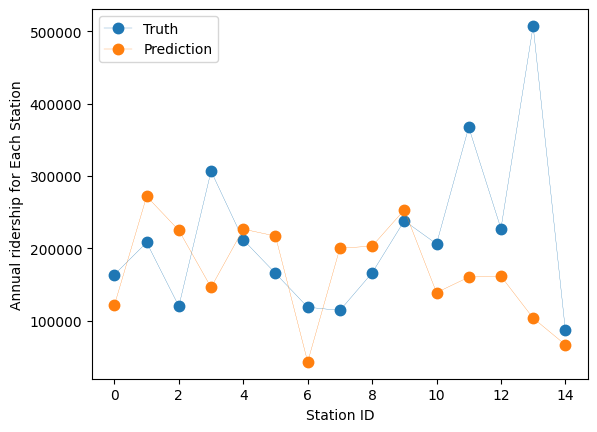

In [80]:
plt.plot(y_val*(OD_BART.max() - OD_BART.min()) + OD_BART.min(), '.-', linewidth=0.2, markersize=15, label='Truth')
plt.plot(y_pred*(OD_BART.max() - OD_BART.min()) + OD_BART.min(), '.-', linewidth=0.2, markersize=15, label='Prediction')
plt.xlabel("Station ID")
plt.ylabel("Annual ridership for Each Station")
plt.legend()

## The results seem to be bad, how to improve?